In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving claimants.csv to claimants.csv


In [3]:
data = pd.read_csv("claimants.csv")

In [4]:
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [6]:
data.shape

(1340, 7)

In [7]:
len(data.CASENUM.unique())

1283

In [8]:
data.drop(["CASENUM"],inplace=True,axis=1)

In [9]:
data.shape

(1340, 6)

In [10]:
# Removing NA values in data set
data = data.dropna()
data.shape

(1096, 6)

In [11]:
# Dividing oour data into input and output variables
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [12]:
# Logistic Regression and fit model
# Here classifier is the model, and we are fittinf X,Y into the dataset
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [13]:
# Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [14]:
y_pred_df = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [15]:
# Confusion Matrix for model accuracy
''' True,False,Pos,Neg
[TP   FP
 FN   TN]
'''
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [16]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [32]:
#Predict for Y dataset

classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

# ROC curve

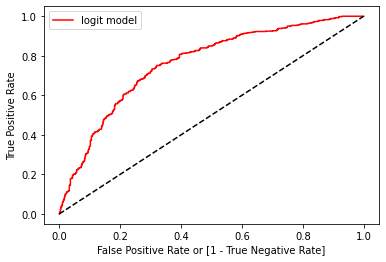

In [17]:
# Import AreaUnderCurve from ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()

Area under curve

In [18]:
auc

0.7108589063606365

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096

